In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle, glob
from statutils import vis # to use this, execute ``git clone git@github.com:yakirr/statutils.git`` and add to python path
import pp, pf

In [19]:
dset = 'harmcca20'
methods = [
    'CNAfast',
    'MASC_leiden0p2',
    'MASC_leiden1',
    'MASC_leiden2',
    'MASC_leiden5',
]

In [20]:
def read(simname):
    df = pd.DataFrame()

    folder = pf.simresults(dset, simname)
    for m in methods:
        rs = [
                pickle.load(open(f, 'rb'))
                for f in glob.glob('{}/{}/*.p'.format(folder, m))
            ]
        rs = pd.DataFrame({
            'id':[r.id for r in rs],
            'p':[r.p for r in rs],
            'interp':[r.interp for r in rs],
            'pheno':[r.pheno for r in rs],
            'method':[m for r in rs]
        })
        df = df.append(rs, ignore_index=True)
    return df

def aggregate(df):
    return df[['id','method','p','interp']].pivot(index='id', columns='method')

null_vanilla
null_batch


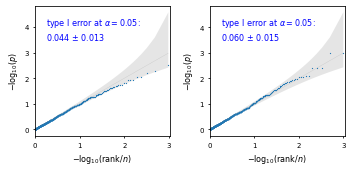

In [23]:
fig, axs = plt.subplots(1,2, figsize=(5,2.5))

for i, simname in enumerate(['null_vanilla', 'null_batch']):
    ax = axs[i]
    print(simname)
    df = read(simname)
    results = aggregate(df)
    t1e, ci = (results.p.CNAfast <= 0.05).mean(), 2*(results.p.CNAfast <= 0.05).std()/np.sqrt(len(results))
    vis.qqplot(results.p.CNAfast, errorbars=True, ax=ax, **pp.qqprops)
    ax.text(0.25, 3.5, 'type I error at $\\alpha=0.05$:\n{:.3f} $\\pm$ {:.3f}'.format(t1e, ci),
        fontsize=pp.labelfontsize, color='b')
    ax.tick_params(**pp.tickprops)
plt.tight_layout()
plt.savefig('../_figs/suppfig.nullqq.pdf')